# Part 1: Color point analysis of an image pixels with KMeans

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 10)
from sklearn.cluster import KMeans

Populating the interactive namespace from numpy and matplotlib


The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares. This algorithm requires the number of clusters to be specified. It scales well to large number of samples and has been used across a large range of application areas in many different fields. For more information: http://scikit-learn.org/stable/modules/clustering.html

This algorithm is guaranteed to converge to a result. The result may be a local optimum (i.e. not necessarily the best possible outcome), meaning that assessing more than one run of the algorithm with randomized starting centroids may give a better outcome.

We will cluster color points of an each pixel of an image. In this context, color point of a pixel refers to R/G and B/G values for each pixel in RGB space.

## load an image

In [17]:
img = cv2.imread("../input_images/sample_image.jpg")
if img is None:
    print("Could not open or find the image")

In [18]:
# OpenCV follows BGR order, while matplotlib follows RGB order.
# So when we display an image loaded in OpenCV using pylab functions, we need to convert it into RGB mode
def show_opencv_image(img):
    plt.imshow(img[:,:,::-1])

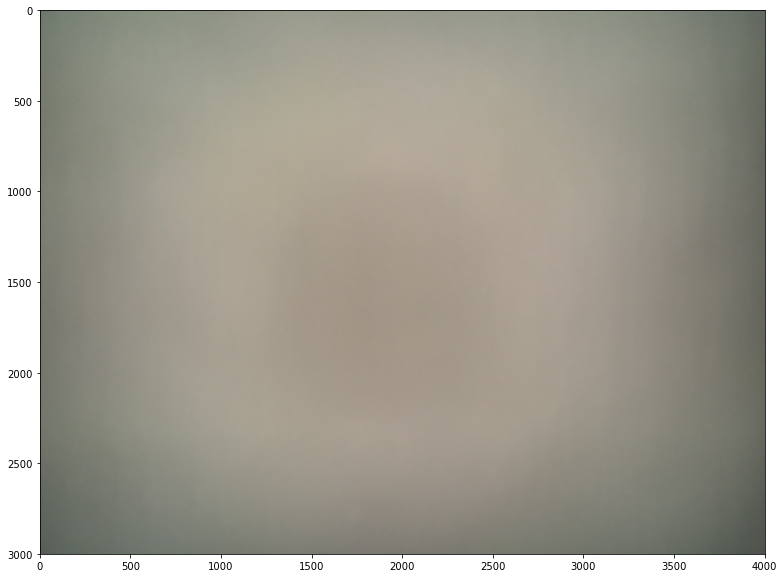

In [19]:
show_opencv_image(img)

## prepare data
As openCV color channels are in BGR order, we first convert the order of color channels from BGR to RGB, that is more intiutive when working with colors. Then we resphape the image in two dimensional array. An image loaded with opencv has three dimensions (h, w, #channels), so we convert it to two dimensional array (h*w, #channels). It is easier to work on 2D array than 3D array.

In [20]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_rgb.shape

(3000, 4000, 3)

In [21]:
img_2d = img_rgb.reshape(img_rgb.shape[0]* img_rgb.shape[1], 3)
img_2d.shape

(12000000, 3)

In [22]:
img_2d

array([[106, 120, 107],
       [106, 120, 107],
       [106, 120, 107],
       ..., 
       [ 77,  82,  76],
       [ 77,  82,  76],
       [ 77,  82,  76]], dtype=uint8)

When we work with KMeans algorithm, we have (h * w) rows corresponding pixels and each pixel will have two features, R/G and B/G. So we will have two columns representing our feautures.

In [23]:
def compute_features_color_point(image_2d):
    r = image_2d[:,0]
    g = image_2d[:,1]
    b = image_2d[:,2]
    r = r.astype(float)
    g = g.astype(float)
    b = b.astype(float)
    rg = r/g
    bg = b/g
    return np.vstack((rg,bg)).T

In [24]:
img_color_point = compute_features_color_point(img_2d)
img_color_point.shape

(12000000, 2)

In [25]:
img_color_point

array([[ 0.88333333,  0.89166667],
       [ 0.88333333,  0.89166667],
       [ 0.88333333,  0.89166667],
       ..., 
       [ 0.93902439,  0.92682927],
       [ 0.93902439,  0.92682927],
       [ 0.93902439,  0.92682927]])

## explore KMeans
KMeans algorithm accepts number of clusters as an input. The function below accept a list of K that we want to give
as an input to algorithm and it returns the list of models. This allows us to run the algorithm once for the different K values that we want to explore and later on we can work with the models further. We also provide input image as prepared above as an input to function. KMeans is going to cluster the each image pixel regarding the two features.

In [26]:
def explore_K(n_cluster_list, X):
    clt_ = list()
    for i in n_cluster_list:
        print("n_clusters: ", i)
        clt = KMeans(n_clusters=i).fit(X)
        clt_.append(clt)
    return clt_

In [27]:
K_values= [2,3,4,5,6,7,8,9]
# Be patient ! 
# Depending the number of K, list lenght and input image, function call below can take a while !
clt_model_list = explore_K(K_values, img_color_point)

('n_clusters: ', 2)
('n_clusters: ', 3)
('n_clusters: ', 4)
('n_clusters: ', 5)
('n_clusters: ', 6)
('n_clusters: ', 7)
('n_clusters: ', 8)
('n_clusters: ', 9)


In [28]:
clt_model_list

[KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max

## plot centroids

In [29]:
def plot_centroids(clt):
    """
    plot the centroids of each cluster
    """
    marker_list = ['o', 'v', 's', '*', '+', 'x', '8', 'D']
    for i in range(len(clt.cluster_centers_)):
        plt.scatter(clt.cluster_centers_[i,0],
                    clt.cluster_centers_[i,1], 
                    marker=marker_list[i], 
                    s=200,
                    color='k', 
                    label=i)
    plt.legend()
    plt.title("centroids")
    plt.xlabel("R/G")
    plt.ylabel("B/G")

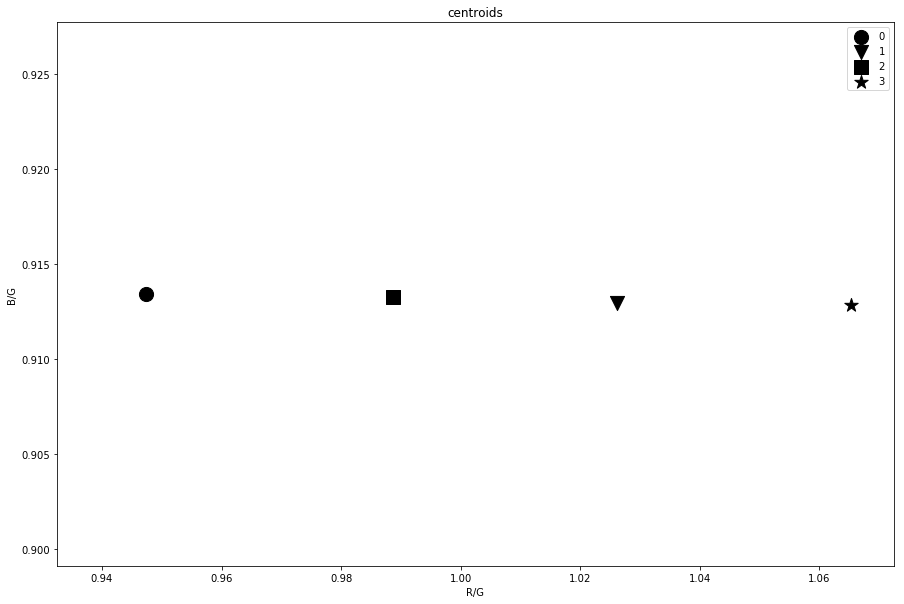

In [30]:
# We can select a model from the list and plot the centroids
plot_centroids(clt_model_list[2]) # index 2 corresponds to model with n_clusters=4 (python list index starts with zero)

## plot all clusters with centroids

In [31]:
def plot_clusters(clt, X):
    """
    plot the centroids and clusters (of pixels) with different color and shape
    """
    marker_list = ['o', 'v', 's', '*', '+', 'x', '8', 'D']
    color_list = ['k', 'grey', 'r', 'g', 'b', 'c', 'm', 'y']
    labels = np.unique(clt.labels_)
    for l in labels:
        index = np.where(clt.labels_ == labels[l])
        plt.scatter(X[index, 0], 
                    X[index, 1], 
                    marker=marker_list[l], 
                    color=color_list[l])
        
    # plot centroids
    for i in range(len(clt.cluster_centers_)):
        plt.scatter(clt.cluster_centers_[i,0],
                    clt.cluster_centers_[i,1], 
                    marker=marker_list[i], s=200,
                    color='k', label=i)
    plt.legend()
    plt.xlabel("R/G")
    plt.ylabel("B/G")
    plt.title("clusters")

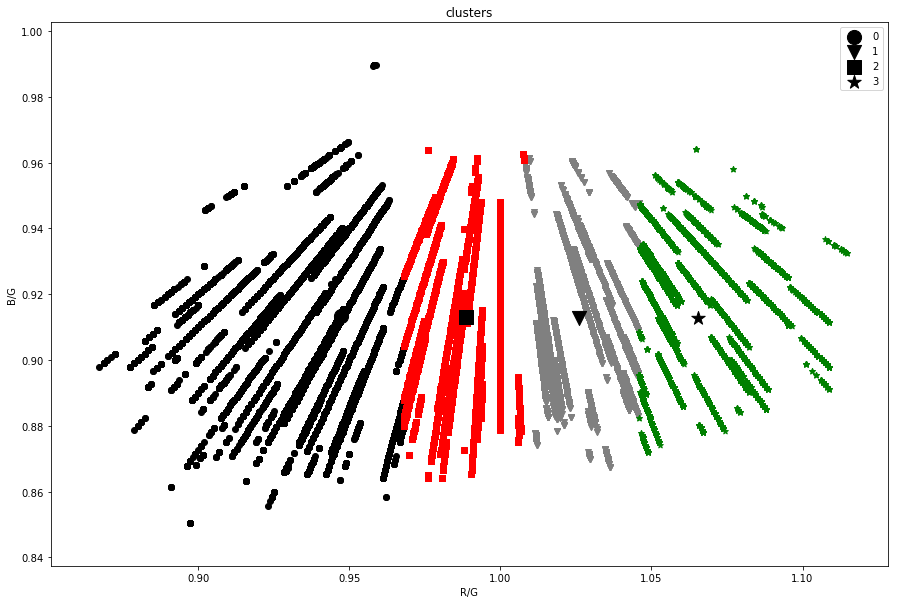

In [32]:
# plotting can take a while! 
plot_clusters(clt_model_list[2], img_color_point)

## find elbow point
Which K is the best to use. One straightforward method is elbow method. (https://en.wikipedia.org/wiki/Elbow_method_(clustering)). Checking the inertia (sum of squared distances of samples to their closest cluster center.) vs. K can give an idea about elbow point.
The function below plot the squared root of inertia vs K.

In [33]:
def plot_k_vs_inertia(clt_list):
    for i, v in enumerate(clt_list):
        plt.plot(v.n_clusters, np.sqrt(v.inertia_), '-o')
    plt.xlabel("number of clusters (K)")
    plt.ylabel("inertia (distance)")

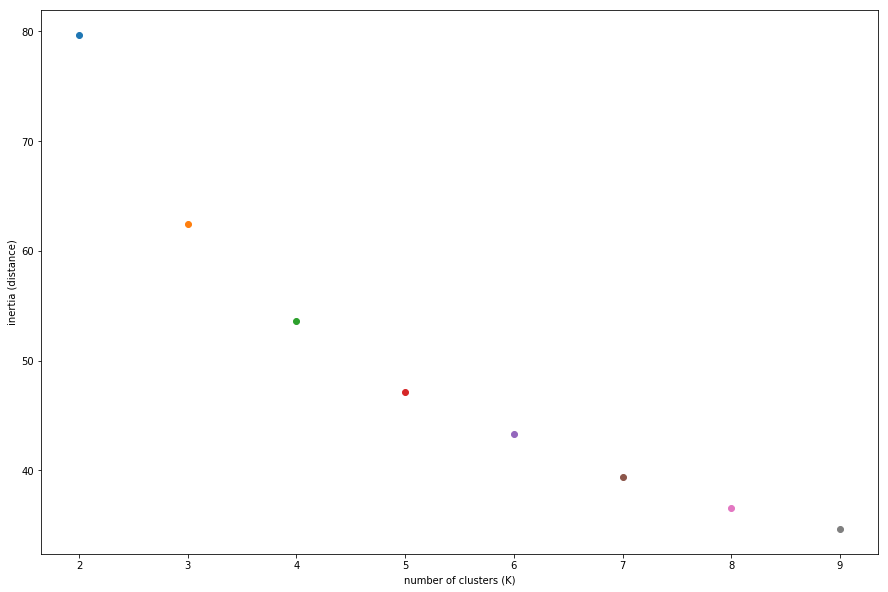

In [34]:
plot_k_vs_inertia(clt_model_list)

## histogram
We can also plot the number of pixels belonging to each cluster by using histogram.

In [59]:
def histogram_color_point(clt):
    num_labels = np.arange(0, len(np.unique(clt.labels_)) + 1)
    (hist, _) = np.histogram(clt.labels_, bins=num_labels)
    return hist

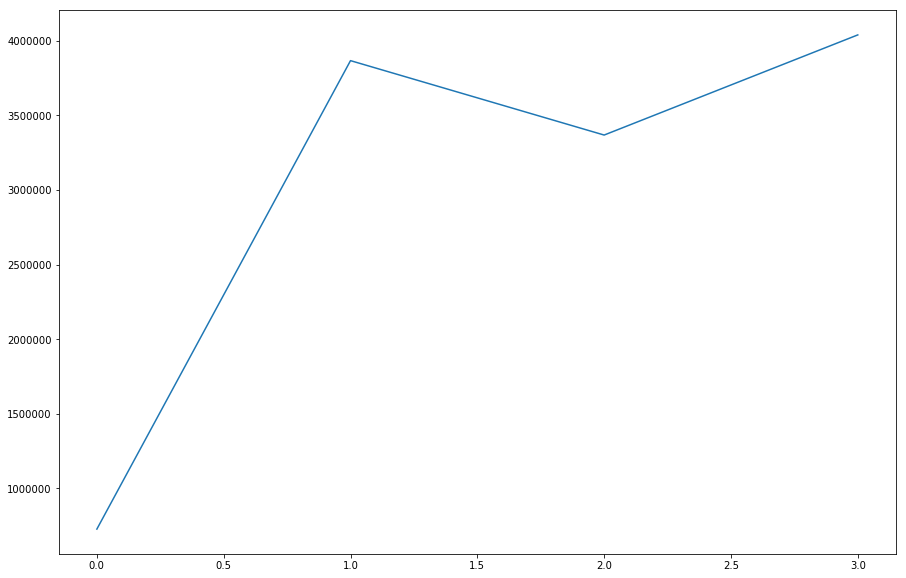

In [60]:
hist= histogram_color_point(clt_model_list[2])
plt.plot(hist)

## show the clusters in original image dimension
It would be useful to visualize which pixel in an image belongs to which cluster.

In [39]:
def plot_clusters_2d(clt, image):
    labels = np.unique(clt.labels_)
    red = [255, 0, 0]
    green = [0, 128, 0]
    blue = [0, 0, 255]
    cyan = [0, 255, 255]
    magenta = [255, 0, 255]
    yellow = [255, 255, 0]
    black = [0,0,0]
    grey = [128,128,128]
    rgb_colors = [black, grey, red, green, blue, cyan, magenta, yellow]
    for l in labels:
        index = np.where(clt.labels_ == labels[l])
        image[index] = rgb_colors[l]
    return image

In [40]:
image = plot_clusters_2d(clt_model_list[2], img_2d)
img_cluster = image.reshape(img_rgb.shape[0], img_rgb.shape[1], 3)

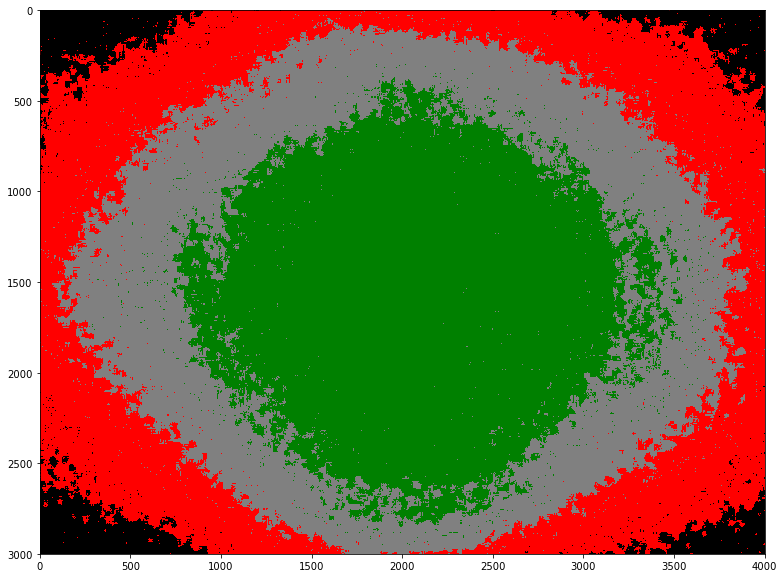

In [41]:
plt.imshow(img_cluster)

# Part 2: Intensity analysis of an image pixels with KMeans

In [42]:
# Lets use the same input image, we apply similar data preparation as we have done above.
img_rgb_intensity = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_2d_intensity = img_rgb_intensity.reshape(img_rgb_intensity.shape[0]* img_rgb_intensity.shape[1], 3)
img_2d_intensity.shape

(12000000, 3)

In [43]:
# For intensity analysis, we use sum of the color channel values as an feature.
def compute_intensity_feature(image_2d):
    r = image_2d[:,0]
    g = image_2d[:,1]
    b = image_2d[:,2]
    r = r.astype(float)
    g = g.astype(float)
    b = b.astype(float)
    sum_rgb = r + g + b
    return sum_rgb.reshape(image_2d.shape[0], 1)

In [44]:
image_intensity = compute_intensity_feature(img_2d_intensity)

In [45]:
image_intensity.shape

(12000000, 1)

In [46]:
clt_model_intensity = explore_K([4], image_intensity)

('n_clusters: ', 4)


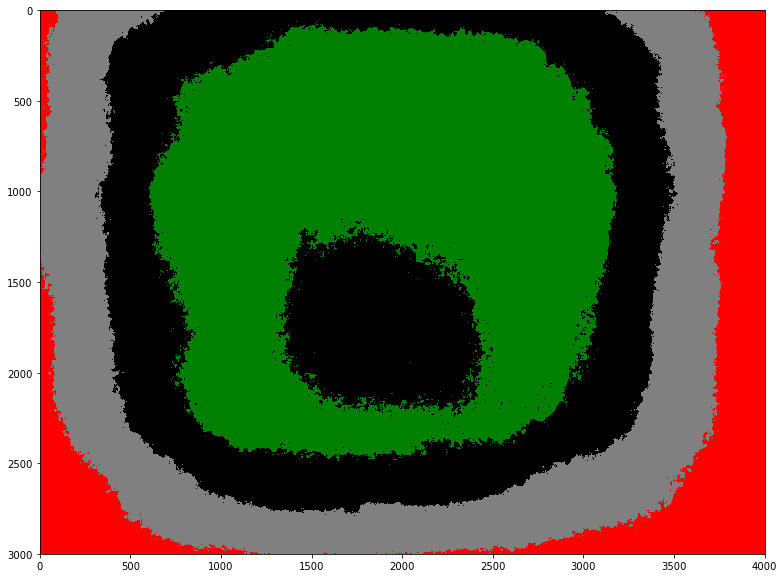

In [47]:
image = plot_clusters_2d(clt_model_intensity[0], img_2d_intensity)
img_cluster = image.reshape(img_rgb_intensity.shape[0], img_rgb_intensity.shape[1], 3)
plt.imshow(img_cluster)